### Prodigy ML Task 2 ###
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

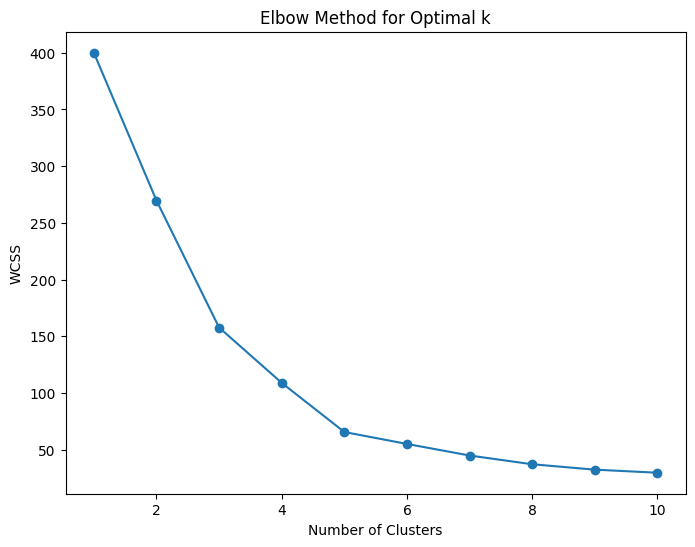


Silhouette Score: 0.55

Data with Clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


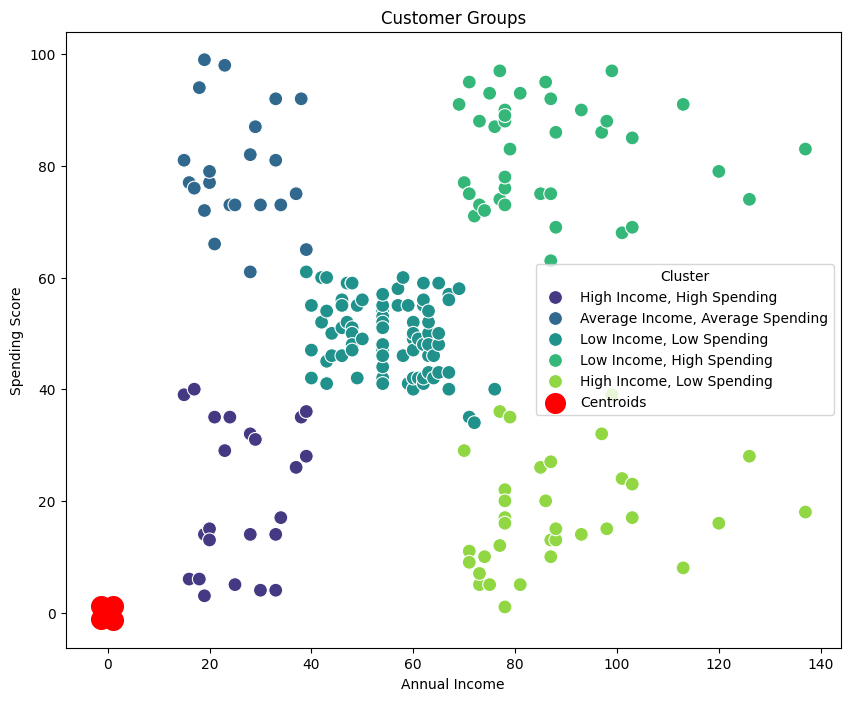

The customer belongs to: Low Income, Low Spending
Model saved to customer_segmentation_kmeans_model.pkl


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle

# File path
data_path = r'C:\Study Material\Iternship\Prodigy\Task 2\archive\Mall_Customers.csv'

# Load the dataset
customer_data = pd.read_csv(data_path)

# Drop non-numeric columns and check the dataset
df_numeric = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Check for missing values
if df_numeric.isnull().sum().any():
    df_numeric = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the Elbow plot
n_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
customer_data['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'\nSilhouette Score: {silhouette_avg:.2f}')

# Display the first few rows with cluster assignments
print("\nData with Clusters:")
print(customer_data.head())

# Define cluster names
cluster_names = {
    0: "Low Income, Low Spending",
    1: "Low Income, High Spending",
    2: "Average Income, Average Spending",
    3: "High Income, Low Spending",
    4: "High Income, High Spending"
}

# Map the cluster labels to names
customer_data['Cluster_Name'] = customer_data['Cluster'].map(cluster_names)

# Visualize all the clusters and their Centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_numeric['Annual Income (k$)'], y=df_numeric['Spending Score (1-100)'],
                hue=customer_data['Cluster_Name'], palette='viridis', s=100, legend='full')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Example input data for prediction
input_data = pd.DataFrame([(60, 50)], columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Predict the cluster for the new input data
cluster_prediction = kmeans.predict(input_data_scaled)[0]

# Get the name of the predicted cluster
predicted_cluster_name = cluster_names.get(cluster_prediction, "Unknown Cluster")
print(f'The customer belongs to: {predicted_cluster_name}')

# Save the trained K-Means model
model_filename = 'customer_segmentation_kmeans_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(kmeans, file)

print(f"Model saved to {model_filename}")
